<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import os
import sys
#from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
import parmed
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from sklearn.utils.extmath import svd_flip, randomized_svd
import scipy.io
from scipy.sparse.linalg import svds
import scipy.ndimage as ndi
from heapq import heappush, heappop
from pprint import pprint
from random import uniform


In [3]:
sample_x_0 = np.random.normal(0,1,size=2000)
sample_x_1 = np.random.normal(0,1,size=2000)


sample_y_0 = np.random.normal(0,2,size=2000)
sample_y_1 = np.random.normal(0,2,size=2000)


sample_z_0 = np.random.normal(0,2,size=2000)
sample_z_1 = np.random.normal(0,2,size=2000)


sample_x = np.cumsum(sample_x_0)
sample_y = np.cumsum(sample_y_0)
sample_z = np.cumsum(sample_z_0)

sample_x

array([ 1.26579623, -0.11912135,  0.57661905, ..., 44.43915245,
       45.35094781, 43.48856053])

In [4]:
def svd_wrapper(Y, k, method='svds'):
    if method is 'svds':
        Ut, St, Vt = svds(Y, k)
        idx = np.argsort(St)[::-1]        
        St = St[idx] # have issue with sorting zero singular values
        Ut, Vt = svd_flip(Ut[:, idx], Vt[idx])
    elif method is 'random':
        Ut, St, Vt = randomized_svd(Y, k)
    else:
        Ut, St, Vt = np.linalg.svd(Y, full_matrices=False)
        # now truncate it to k
        Ut = Ut[:, :k]
        St = np.diag(St[:k])
        Vt = Vt[:k, :]
        
    return Ut, St, Vt

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-f8bad8835ad6>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'svds':
<ipython-input-4-f8bad8835ad6>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif method is 'random':


In [17]:
trace_1 = np.array([sample_x_0, sample_y_0*sample_z_0])

array([ 1.26579623, -1.38491758,  0.6957404 , ..., -0.72383753,
        0.91179537, -1.86238728])

In [34]:
trace_2 = np.array([sample_x_1, sample_y_1*sample_z_1])
[len(a) for a in trace_2]

[2000, 2000]

In [37]:
mat= scipy.io.loadmat('collision_0-256.mat')
coll = mat['trace']
coll

array([[[-38.588509,  31.486088, 124.245422],
        [-38.904312,  32.39389 , 124.620537],
        [-38.182739,  31.671265, 123.36467 ],
        ...,
        [ 11.096417,  24.958757, 137.562073],
        [ 12.030968,  24.631891, 137.536453],
        [ 10.993629,  24.990107, 138.5569  ]],

       [[-38.581264,  31.483677, 124.246391],
        [-38.900215,  32.395161, 124.610184],
        [-38.200001,  31.667702, 123.353279],
        ...,
        [ 11.097125,  24.960527, 137.564529],
        [ 12.027571,  24.618774, 137.568039],
        [ 10.978704,  25.003279, 138.555832]],

       [[-38.575676,  31.481556, 124.247566],
        [-38.890774,  32.389526, 124.600639],
        [-38.210121,  31.663651, 123.336502],
        ...,
        [ 11.097929,  24.96217 , 137.56723 ],
        [ 12.024109,  24.605516, 137.596664],
        [ 10.961408,  25.017021, 138.551788]],

       ...,

       [[-37.960289,  31.775253, 125.563232],
        [-38.260132,  32.152901, 126.456978],
        [-37.599461,  

In [39]:
#coll.shape
(x,y,z) = coll.shape

In [40]:
coll.shape

(255, 9033, 3)

In [41]:
t2 = coll.reshape((x, y*z),order='C')
t2

array([[-38.588509,  31.486088, 124.245422, ...,  10.993629,  24.990107,
        138.5569  ],
       [-38.581264,  31.483677, 124.246391, ...,  10.978704,  25.003279,
        138.555832],
       [-38.575676,  31.481556, 124.247566, ...,  10.961408,  25.017021,
        138.551788],
       ...,
       [-37.960289,  31.775253, 125.563232, ...,  10.153194,  25.984735,
        137.847198],
       [-37.956963,  31.771517, 125.57341 , ...,  10.15202 ,  25.991091,
        137.79834 ],
       [-37.954533,  31.768862, 125.583534, ...,  10.156665,  25.994097,
        137.743195]])

In [42]:
Utl, Stl, VTtl = svd_wrapper(t2, 2, method='random')
Utl

array([[ 0.06262202, -0.07996474],
       [ 0.062622  , -0.07999833],
       [ 0.06262199, -0.0800133 ],
       [ 0.06262198, -0.08000829],
       [ 0.06262198, -0.07998522],
       [ 0.06262199, -0.07994068],
       [ 0.062622  , -0.07987249],
       [ 0.06262202, -0.07978315],
       [ 0.06262204, -0.07967896],
       [ 0.06262207, -0.07956161],
       [ 0.0626221 , -0.07943522],
       [ 0.06262213, -0.07929855],
       [ 0.06262215, -0.07915119],
       [ 0.06262218, -0.07899272],
       [ 0.06262219, -0.07882493],
       [ 0.06262219, -0.07865008],
       [ 0.06262218, -0.07846716],
       [ 0.06262217, -0.07828069],
       [ 0.06262215, -0.07809331],
       [ 0.06262212, -0.07790836],
       [ 0.0626221 , -0.07772388],
       [ 0.06262208, -0.07753147],
       [ 0.06262206, -0.07732281],
       [ 0.06262204, -0.07710111],
       [ 0.06262203, -0.07686733],
       [ 0.06262202, -0.07661735],
       [ 0.06262201, -0.07635057],
       [ 0.062622  , -0.07606798],
       [ 0.062622  ,

In [43]:
Stl

array([263933.34629611,    409.13272312])

In [44]:
VTtl

array([[-0.00232241,  0.00191566,  0.00753887, ...,  0.00065721,
         0.00152268,  0.00833807],
       [ 0.00628882,  0.00426916,  0.01536466, ...,  0.00577196,
         0.00310528,  0.00884209]])

In [45]:
Utl.shape

(255, 2)

In [60]:
c = Utl
s = Stl

step = 25
n_dim = 2

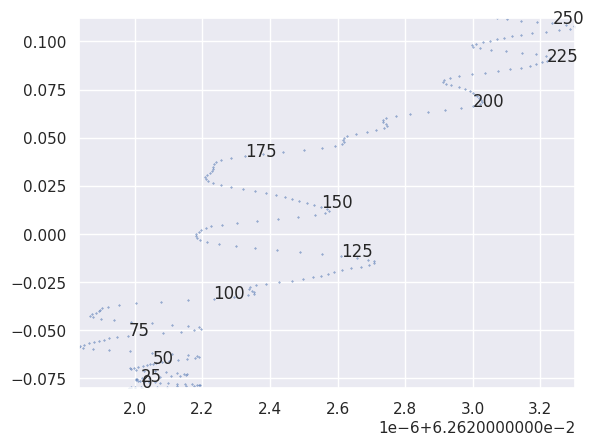

In [51]:
fig, ax = plt.subplots()
ax.scatter(c[:,0],c[:,1], marker=".", c='b', s=0.5)
ax.set_xlim(min(c[:,0]), max(c[:,0]))
ax.set_ylim(min(c[:,1]), max(c[:,1]))
for i in range(0,x,step):
    ax.annotate(str(i),(c[i,0],c[i,1]))
plt.show()

In [56]:
class WeightedReservoirSampler:
    def __init__(self, reservoir_size):
        self.m = reservoir_size

        self.reservoir = []
        
    def add(self, weight, data):
        rw = uniform(0.0,1.0)**(1.0/weight)
        if(len(self.reservoir)< self.m):
            heappush(self.reservoir, (rw,data))
        elif rw > self.reservoir[0][0]:
            heappop(self.reservoir)
            heappush(self.reservoir, (rw,data))
        #print(len(self.reservoir))

In [62]:
class MDTrSampler:
    def __init__(self, n_atoms, n_dim = 2, conv_size = 50, n_samples=1000, batch_size=100, manifold_size=64):
        self.n_dim = n_dim
        self.conv_size = conv_size
        self.n_atoms = n_atoms
        self.batch_size = batch_size
        self.l = manifold_size
        self.n_samples = n_samples
        self.bq = np.zeros((batch_size,n_atoms,3)) # batch queue
        self.total_samples = 0
        self.bq_index = 0
        self.Btp = np.zeros((n_atoms*3,self.l))
        self.strm_smplr = WeightedReservoirSampler(n_samples)
        self.last_Vt = None
    
    def traj_char(self, c, s):
        x = c.shape[0]
        # scaled data <-- not so much meaningful as we're doing l2 normalization later
        ps = np.mat(c[:,:self.n_dim]) * np.mat(np.diag(s[:self.n_dim]))
        # gradient or changes of each data point
        psd = ps[0:(x-1),:self.n_dim] - ps[1:x, :self.n_dim];
        
        # convoluted gradient --> smoothed gradient
        psdm = ndi.convolve(psd, np.ones((self.conv_size,2))/self.conv_size*2);
        # L2 normalized smoothed gradients --> now we focus on the angle of gradient only as atoms may move different speed 
        npsdm = np.divide(psdm, np.mat(np.sum(np.abs(psdm)**2,axis=-1)**(1./2)).T  * np.mat(np.ones((1,n_dim))))
        # Angle smoothing with the assumption that the overall angle can not be radically changed
        nmpsdm = ndi.convolve(npsdm, np.ones((self.conv_size,2))/self.conv_size*2);
        # Smoothed angle changes (accelerations)
        psdd = nmpsdm[0:(x-2)] - nmpsdm[1:(x-1)]
        # results for gradient of changes
        psdu = np.sum(abs(psd),axis=1)
        # results of smoothed normalized acceleration
        psddu = np.sum(abs(psdd),axis=1)
        prob_dist = (abs(psddu) / np.sum(psddu))
        return nmpsdm, psddu, prob_dist
    
    def strmML(self, t2):
        n_t = t2.shape[1]
        Ct = np.concatenate( (self.Btp, t2), axis = 1)
        Ct = Ct[:, ~(Ct==0).all(0)]

        Ut, St, Vt = svd_wrapper(Ct, self.l) #SVD_l(matrix)
        Ut_l = Ut[:, :self.l]
        St_l = St[:self.l] - St[self.l-1] # to be adaptive, added singular substraction
        Vt_l = Vt[:self.l, -n_t:]
        self.Btp= np.dot(Ut_l, np.diag(St_l))

        return Ut_l, St_l, Vt_l
    
    def batch_sampling(self, trace):
        (x,y,z) = trace.shape
        self.sampling_rate = float(self.n_samples) / float(x)
        t2 = trace.reshape((x, y*z),order='C')
        c,s,v = svd_wrapper(t2, 2, method='random')
        nmpsdm, psddu, prob_dist = self.traj_char(c,s) 
        total = 10**-10 + prob_dist[0]
        sampling_entries = int(x * self.sampling_rate)
        target = np.zeros((sampling_entries, y, z))
        time_stamps = np.zeros(sampling_entries)
        #output initialization: the first one should be added always
        target[0,:,:] = trace[0,:,:]
        time_stamps[0] = 0;
        t_idx = 1;
        for i in range(2,x):
            total = total + prob_dist[i-2];
            if(total > 1 / float(sampling_entries - 1)):
                target[t_idx,:,:] = trace[i,:,:]
                time_stamps[t_idx] = i
                total = total - 1 / float(sampling_entries-1);
                t_idx = t_idx + 1;
        return target, time_stamps
    
    
    def adaptive_sampling_update(self):
        t2 = self.bq[0:self.bq_index,:,:].reshape((self.bq_index, self.n_atoms*z),order='C').T
        Ut, s, VTt = self.strmML(t2)
        if self.last_Vt is None: # for the first time
            c = VTt.T
            self.strm_smplr.add(10**10,[0, self.bq[0,:,:]])
            nmpsdm, psddu, prob_dist = self.traj_char(c, s)
            sidx = self.total_samples - self.bq_index
            for i in range(2,self.bq_index):
                self.strm_smplr.add(psddu[i-2], [sidx+i, self.bq[i,:,:]])
        else:
            c =  np.concatenate( (self.last_Vt, VTt.T), axis = 0)
            nmpsdm, psddu, prob_dist = self.traj_char(c, s)
            sidx = self.total_samples - self.bq_index
            for i in range(0,self.bq_index):
                self.strm_smplr.add(psddu[i], [sidx+i, self.bq[i,:,:]])
                
        self.last_Vt = VTt.T[-2:,:] # for last two to start compare against
        
        

    def adaptive_sampling_step(self, dataframe_t):
        self.total_samples = self.total_samples + 1
        self.bq[self.bq_index] = dataframe_t
        self.bq_index = self.bq_index+1
        if self.bq_index == (self.batch_size):
            self.adaptive_sampling_update()
            self.bq_index = 0
        

In [68]:
mds = MDTrSampler(y, n_dim = 2, conv_size = 5, n_samples=100, batch_size=10, manifold_size=24)

nmpsdm, psddu, prob_dist = mds.traj_char(c,s)  

In [69]:
nmpsdm

array([[ 1.83290033,  1.68798506],
       [ 0.732375  ,  0.36517201],
       [-0.37030019, -0.97521062],
       [-1.4747852 , -2.31119708],
       [-2.58368202, -3.6150861 ],
       [-2.7129247 , -3.51099968],
       [-2.72205808, -3.49008276],
       [-2.7253825 , -3.48179331],
       [-2.72639885, -3.47920375],
       [-2.72533325, -3.4819032 ],
       [-2.72175857, -3.49079275],
       [-2.71596029, -3.504749  ],
       [-2.70806731, -3.52308322],
       [-2.69838742, -3.54465789],
       [-2.68782129, -3.56708864],
       [-2.67753834, -3.58786828],
       [-2.66875054, -3.60491982],
       [-2.66212402, -3.61736627],
       [-2.65824171, -3.62447415],
       [-2.65723911, -3.62627762],
       [-2.65874506, -3.62358874],
       [-2.66170451, -3.61829229],
       [-2.66536992, -3.61168038],
       [-2.66920566, -3.60466214],
       [-2.67297861, -3.59762043],
       [-2.67660601, -3.59068734],
       [-2.68034198, -3.58337716],
       [-2.68443559, -3.5751793 ],
       [-2.6887484 ,

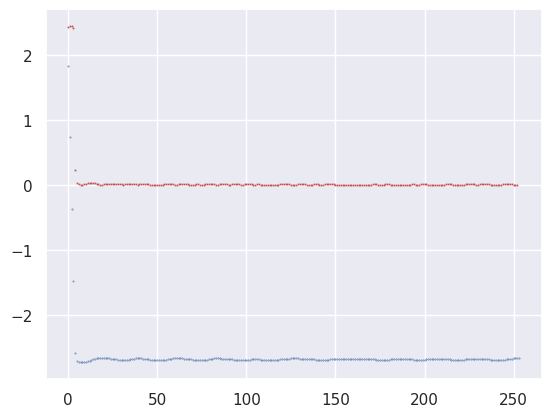

In [70]:
fig_b, ax_b = plt.subplots()
ax_b.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_b.scatter(range(0,psddu.shape[0]),psddu[:],marker="x", c="r", s=0.2)
plt.show()

In [76]:
y

9033

In [72]:
mds2 = MDTrSampler(y, n_dim = 2, conv_size = 50, n_samples=64, batch_size=512, manifold_size=256)
for i in range(x):
    mds2.adaptive_sampling_step(coll[i,:,:])

In [75]:
mds2.strm_smplr.reservoir

[]

In [73]:
adaptive_samples = sorted([ mds2.strm_smplr.reservoir[i][1][0] for i in range(64)])
fig_d, ax_d = plt.subplots()
ax_d.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_d.scatter(adaptive_samples, np.ones(len(adaptive_samples)),marker="x",c="r", s=10.0)
plt.show()

IndexError: list index out of range

In [19]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n, gamma=0.5):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
 
    


    return xx + yy - xy - yx    

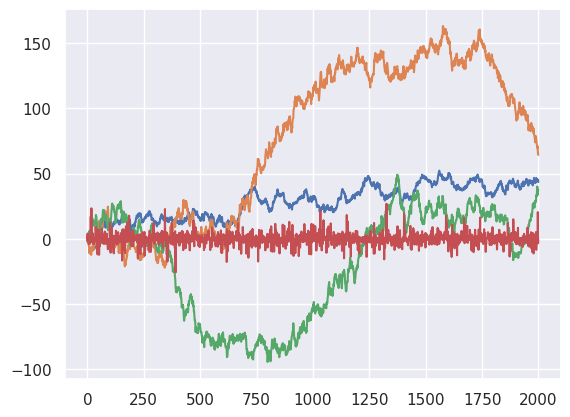

In [20]:
plt.plot(np.arange(0,2000),sample_x)
plt.plot(np.arange(0,2000),sample_y)
plt.plot(np.arange(0,2000),sample_z)
plt.plot(np.arange(0,2000),trace_1[1])
plt.show()

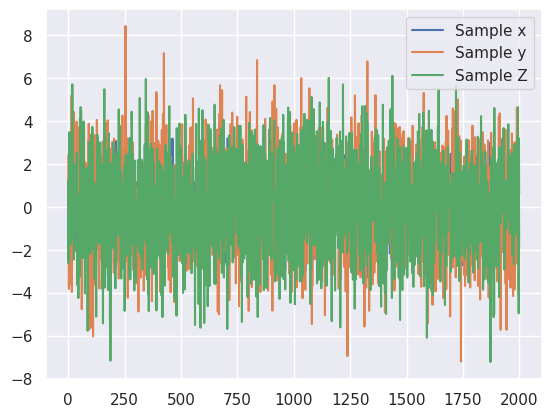

In [21]:
plt.plot(np.arange(0,2000),sample_x_0, label='Sample x')
plt.plot(np.arange(0,2000),sample_y_0, label='Sample y')
plt.plot(np.arange(0,2000),sample_z_0, label='Sample Z')
plt.legend()
plt.show()

In [16]:
T_kcusum = 0

def KCUSUM(x_1, x_2, yz_1, yz_2, h,delta=0):
  global T_kcusum  
  Z_n = 0
  h >= 0
  delta = 0
  n = 400

  for i in range(2,n):

    #sample y

    if i%2 == 0:
      av_n = mmd(x_1,x_2,yz_1,yz_2).mean()
      v_n = av_n/3
    else:
      v_n = 0
      
    Z_n += v_n

    if Z_n < 0:
      Z_n = 0

    if Z_n > h:
      T_kcusum = i
      break
  return T_kcusum

In [22]:
KCUSUM(trace_1[0],trace_2[0],trace_1[1],trace_2[1],5)

264

In [25]:
Ut, St, VTt = svd_wrapper(trace_1, 2, method='random')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [26]:
Ut

array([[ 0.00198438,  0.99999803],
       [ 0.99999803, -0.00198438]])

In [27]:
St

array([181.31948074,  45.1331753 ])

In [28]:
VTt

array([[-0.00569796,  0.02200471, -0.00647459, ...,  0.11287737,
        -0.01937614, -0.00382656],
       [ 0.02809129, -0.03086062,  0.01546692, ..., -0.01693772,
         0.02035684, -0.04123384]])

In [29]:
c = Ut
s = St

In [30]:
n_dim=2
step=1000
c.shape

(2, 2)

In [11]:
trace = [sample_x,sample_y,sample_z]
trace = np.array(trace)
trace.shape
trace[:,156]

array([ -1.26028609, -24.73117756,   8.31469303])

In [15]:
sample_a = [sample_x_0,sample_y_0,sample_z_0]
sample_b = [sample_x_1,sample_y_1,sample_z_1]
sample_a = np.array(sample_a)
sample_b = np.array(sample_b)
sample_b.shape

(3, 2000)

In [18]:
a_sparse, b_sparse = sparse.csr_matrix(sample_a), sparse.csr_matrix(sample_b)
sim_sparse = cosine_similarity(a_sparse, b_sparse, dense_output=True)
print(sim_sparse)

[[ 0.00798422  0.0113843  -0.0008589 ]
 [ 0.00767386 -0.04268317 -0.0078294 ]
 [-0.01395902 -0.00581703  0.04761105]]


In [19]:
sim_array = cosine_similarity(sample_a,sample_b,dense_output=True)
print(sim_array)

[[ 0.00798422  0.0113843  -0.0008589 ]
 [ 0.00767386 -0.04268317 -0.0078294 ]
 [-0.01395902 -0.00581703  0.04761105]]


In [21]:
def cp_vs_h(sample_x_0,sample_y_0,sample_z_0,h_start,h_end,step,delta):
    cps = []
    hs = []
    while h_start<h_end:
        cp = KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,sample_z_0,sample_z_1,h=0,delta=0)
        hs.append(h_start)
        cps.append(cp)
        h_start += step
        plt.plot(hs,cps)
        plt.xlabel('Value of h')
        plt.ylabel('Change points')

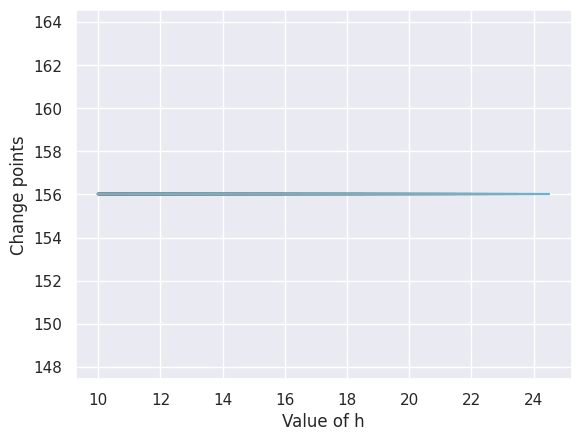

In [28]:
cp_vs_h(sample_x,sample_y,sample_z_0,10,25,0.5,0.05)
plt.show()